# Statistika Dasar di Python

Dalam dunia data science, statistika berperan penting untuk membantu kita memahami dan menganalisis data. Metode mendasar di statistika yang digunakan untuk memahami pola data adalah statistika deskriptif, yang mencakup metode dalam menghitung ukuran pemusatan, penyebaran, dan visualisasi data.

Setiap proyek data science direkomendasikan untuk memasukkan tahapan eksplorasi data dengan statistika deskriptif, minimal kita perlu memahami bagaimana data itu "terpusat" dan "menyebar".

Ukuran pemusatan salah satunya meliputi perhitungan mean, median, dan modus. Sementara itu, ukuran penyebaran salah satunya meliputi varians, standar deviasi, range, dan IQR.

Library yang dapat kita gunakan untuk menghitung ukuran pemusatan dan penyebaran adalah numpy dan pandas. Kemudian, kita dapat melakukan inspeksi secara visual dengan bantuan library matplotlib dan seaborn.

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setup pandas agar kolom yang muncul tidak dibatasi
pd.set_option('display.max_columns', None)

# Cek current working directory
os.getcwd()

In [3]:
# Import data yang dibutuhkan
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Cek informasi kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Dapat kita perhatikan bahwa:

- Data memiliki dimensi 9,994 baris dan 21 kolom.
- Row ID tidak menyimpan informasi penting yang merepresentasikan proses bisnis.
- Perlu dilakukan pengecekan pada informasi yang direpresentasikan oleh masing-masing baris.

In [6]:
# Cek data kosong
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Cek data duplikat
df.duplicated().sum()

0

In [8]:
# Cek granularity data untuk memahami informasi pada masing-masing baris data

# Cek pada Order ID
print('Nilai unik Order ID:', df['Order ID'].nunique(dropna=False))

# Cek pada Order ID dan Product ID
temp = df['Order ID'] + " | " + df['Product ID'] + " | " + df['Product Name']
print('Nilai unik Order ID dan Product ID:', temp.nunique(dropna=False))

Nilai unik Order ID: 5009
Nilai unik Order ID dan Product ID: 9986


In [9]:
# Pengecekan pada identifier order dan product
temp.value_counts(ascending=False)

US-2016-123750 | TEC-AC-10004659 | Imation Secure+ Hardware Encrypted USB 2.0 Flash Drive; 16GB                     2
CA-2017-152912 | OFF-ST-10003208 | Adjustable Depth Letter/Legal Cart                                               2
CA-2016-137043 | FUR-FU-10003664 | Electrix Architect's Clamp-On Swing Arm Lamp, Black                              2
CA-2016-140571 | OFF-PA-10001954 | Xerox 1964                                                                       2
CA-2017-118017 | TEC-AC-10002006 | Memorex Micro Travel Drive 16 GB                                                 2
                                                                                                                   ..
US-2017-109253 | FUR-FU-10000193 | Tenex Chairmats For Use with Hard Floors                                         1
US-2017-109253 | FUR-TA-10001539 | Chromcraft Rectangular Conference Tables                                         1
US-2017-109253 | OFF-BI-10000962 | Acco Flexible ACCOHID

In [10]:
# Mengambil sampel data untuk memahami duplikasi order ID dan product ID
temp = df[df['Order ID'] == 'US-2016-123750'].copy()
temp['unit_price'] = temp['Sales'] / temp['Quantity']
temp

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
429,430,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,OFF-BI-10004584,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,189.588,2,0.7,-145.3508,94.794
430,431,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,7,0.2,76.6395,58.392
431,432,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.960,5,0.2,54.7425,58.392
432,433,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,OFF-ST-10000617,Office Supplies,Storage,Woodgrain Magazine Files by Perma,4.768,2,0.2,-0.7748,2.384


Hipotesis terhadap kejadian duplikasi Order ID dan Product ID: ada perbedaan varian dari produk yang sama, misal dari segi warna yang dipilih.

In [12]:
# Melakukan agregasi untuk level Order ID dan State
agg_func = {
    'Product ID': 'nunique',
    'Sales': 'sum',
    'Profit': 'sum'
}
df_order = df.groupby(['State', 'Customer ID', 'Order ID'])[['Product ID', 'Sales', 'Profit']].agg(agg_func).reset_index()
df_order.rename(
    columns={
        'State': 'state',
        'Customer ID': 'customer_id',
        'Order ID': 'order_id',
        'Product ID': 'num_products',
        'Sales': 'total_sales',
        'Profit': 'total_profit'
    },
    inplace=True
)
df_order

,state,customer_id,order_id,num_products,total_sales,total_profit
0,Alabama,AH-10465,CA-2017-145275,1,14.940,6.8724
1,Alabama,AM-10705,CA-2016-145905,3,1264.140,207.2624
2,Alabama,AP-10720,CA-2016-154403,1,4.980,2.4402
3,Alabama,AS-10225,CA-2014-110408,3,2216.800,444.6902
4,Alabama,BF-11080,CA-2014-163013,1,14.670,3.9609
...,...,...,...,...,...,...
5004,Wisconsin,SS-20590,CA-2016-116540,2,10.070,4.5338
5005,Wisconsin,TB-21595,CA-2016-156300,1,754.450,60.3560
5006,Wisconsin,TS-21160,CA-2016-156251,2,250.480,28.3708
5007,Wisconsin,TS-21655,CA-2015-153878,2,330.150,92.4420


In [13]:
# Mengecek jumlah state
df_order.state.nunique(dropna=False)

49

## Ukuran Pemusatan

Pertanyaan yang dapat kita jawab dengan menggunakan konsep statistika deskriptif, khususnya pada ukuran pemusatan, berdasarkan 49 state tersebut adalah:
1. Berapa mean (rata-rata) dari total profit yang dihasilkan dari seluruh state?
2. Berapa median (nilai tengah) dari total profit yang dihasilkan dari seluruh state?
3. Berapa modus (nilai yang paling sering muncul) dari total profit yang dihasilkan seluruh state?

In [15]:
# Tahap 1. Menghitung total profit dari masing-masing state
df_order_state = df_order.groupby('state')['total_profit'].sum().reset_index()
df_order_state

,state,total_profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


Dapat kita ketahui bahwa ada beberapa state yang tidak menghasilkan profit.

In [17]:
# Kita dapat dengan mudah menjawab hampir seluruh pertanyaan tadi
# menggunakan method describe sebagai berikut:
df_order_state.describe()

,total_profit
count,49.000000
mean,5844.837178
std,17468.637186
min,-25729.356300
25%,230.149700
50%,2196.102300
75%,7285.629300
max,76381.387100


Counts (nilai sumbu y): [ 1.  2.  1.  3.  3. 22.  8.  2.  3.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  2.]
Bin Edges (nilai total profit): [-25729.3563  -20623.81913 -15518.28196 -10412.74479  -5307.20762
   -201.67045   4903.86672  10009.40389  15114.94106  20220.47823
  25326.0154   30431.55257  35537.08974  40642.62691  45748.16408
  50853.70125  55959.23842  61064.77559  66170.31276  71275.84993
  76381.3871 ]


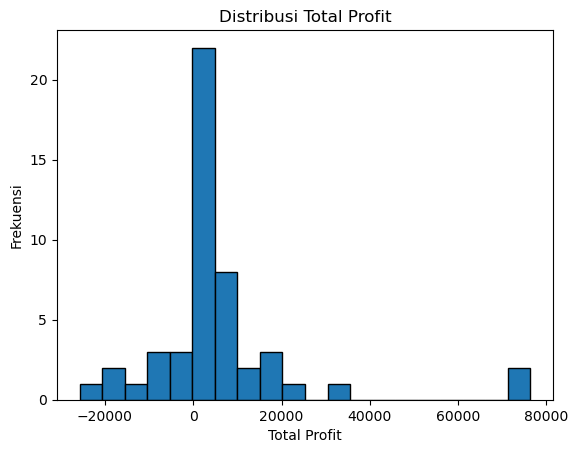

In [18]:
# Membuat histogram dan menyimpan nilai sumbu y (counts) dan x (bin_edges - total profit)
counts, bin_edges, patches = plt.hist(df_order_state.total_profit, bins=20, edgecolor='black')

# Print axis values
print("Counts (nilai sumbu y):", counts)
print("Bin Edges (nilai total profit):", bin_edges)

plt.xlabel('Total Profit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Profit')
plt.show()

In [19]:
# Menggunakan teknik pd.cut
df_order_state['kategori_profit'] = pd.cut(df_order_state['total_profit'], bins=20)
df_order_state['kategori_profit'].value_counts()

kategori_profit
(-201.67, 4903.867]         22
(4903.867, 10009.404]        8
(-10412.745, -5307.208]      3
(-5307.208, -201.67]         3
(15114.941, 20220.478]       3
(71275.85, 76381.387]        2
(-20623.819, -15518.282]     2
(10009.404, 15114.941]       2
(30431.553, 35537.09]        1
(-25831.467, -20623.819]     1
(20220.478, 25326.015]       1
(-15518.282, -10412.745]     1
(35537.09, 40642.627]        0
(40642.627, 45748.164]       0
(45748.164, 50853.701]       0
(50853.701, 55959.238]       0
(55959.238, 61064.776]       0
(61064.776, 66170.313]       0
(66170.313, 71275.85]        0
(25326.015, 30431.553]       0
Name: count, dtype: int64

In [55]:
# Mengecek modus pada daerah yang profit
temp = df_order_state[df_order_state['total_profit'] > 0].copy()
temp['kategori_profit'] = pd.cut(temp['total_profit'], bins=20)
temp['kategori_profit'].value_counts()

kategori_profit
(23.915, 3914.256]        20
(3914.256, 7728.315]       7
(7728.315, 11542.375]      5
(15356.434, 19170.494]     3
(72567.328, 76381.387]     2
(22984.553, 26798.613]     1
(30612.672, 34426.732]     1
(19170.494, 22984.553]     0
(26798.613, 30612.672]     0
(34426.732, 38240.792]     0
(11542.375, 15356.434]     0
(42054.851, 45868.911]     0
(45868.911, 49682.97]      0
(49682.97, 53497.03]       0
(53497.03, 57311.089]      0
(57311.089, 61125.149]     0
(61125.149, 64939.208]     0
(64939.208, 68753.268]     0
(68753.268, 72567.328]     0
(38240.792, 42054.851]     0
Name: count, dtype: int64

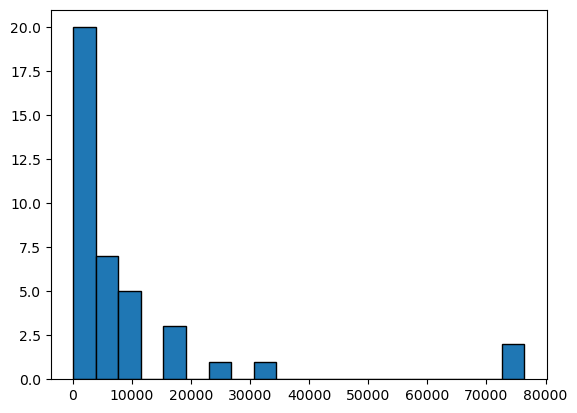

In [57]:
# Visualisasi
plt.hist(temp.total_profit, bins=20, edgecolor='black')
plt.show()

In [67]:
# Mengecek modus pada daerah yang loss
temp = df_order_state[df_order_state['total_profit'] < 0].copy()
temp['kategori_profit'] = pd.cut(temp['total_profit'], bins=5)
temp['kategori_profit'].value_counts()

kategori_profit
(-6098.248, -1190.471]      4
(-15913.802, -11006.025]    2
(-11006.025, -6098.248]     2
(-25753.895, -20821.579]    1
(-20821.579, -15913.802]    1
Name: count, dtype: int64

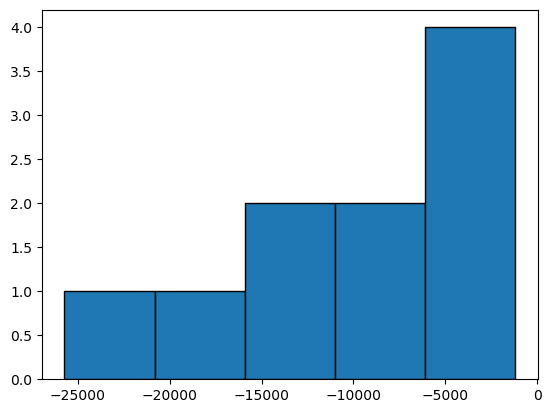

In [65]:
# Visualisasi
plt.hist(temp.total_profit, bins=5, edgecolor='black')
plt.show()

## Ukuran Penyebaran

Pertanyaan yang dapat kita jawab dengan menggunakan konsep statistika deskriptif, khususnya pada ukuran pemusatan, berdasarkan 49 state tersebut adalah:

- Berapa varians dari total profit yang dihasilkan dari seluruh state?
- Berapa standar deviasi dari total profit yang dihasilkan dari seluruh state?
- Berapa range dari total profit yang dihasilkan seluruh state?
- Berapa IQR dari total profit yang dihasilkan seluruh state?

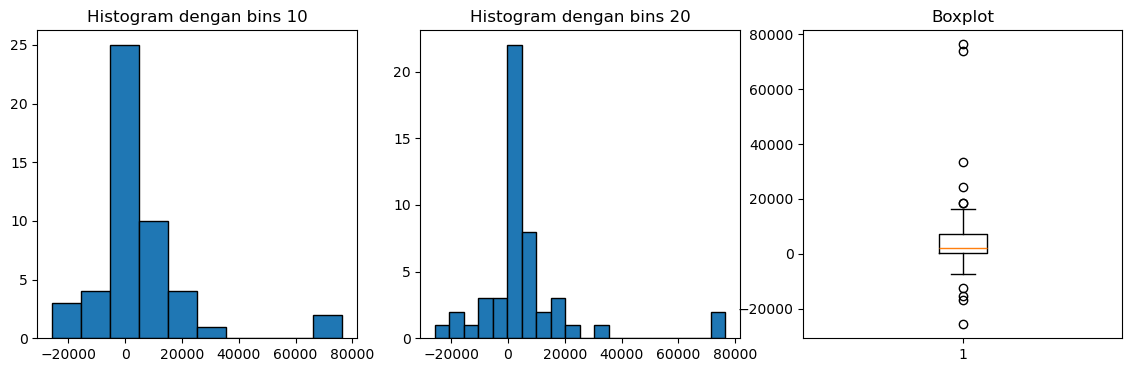

In [91]:
# Melihat distribusi secara visual menggunakan histogram dan boxplot
# Tujuannya untuk mengetahui sebaran data

fig, ax = plt.subplots(1, 3, figsize=(14,4))
ax[0].hist(df_order_state.total_profit, bins=10, edgecolor='black')
ax[0].set_title('Histogram dengan bins 10')
ax[1].hist(df_order_state.total_profit, bins=20, edgecolor='black')
ax[1].set_title('Histogram dengan bins 20')
ax[2].boxplot(df_order_state.total_profit)
ax[2].set_title('Boxplot')
plt.show()

In [105]:
# Menghitung ukuran penyebaran

print('Varians total profit dari seluruh state:', df_order_state.total_profit.var(), '\n')
print('Standar deviasi total profit dari seluruh state:', df_order_state.total_profit.std(), '\n')
print('Range dari total profit seluruh state:', df_order_state.total_profit.max() - df_order_state.total_profit.min(), '\n')
print('IQR (Interquartile Range) dari total profit seluruh state:', df_order_state.total_profit.quantile(0.75) - df_order_state.total_profit.quantile(0.25))

Varians total profit dari seluruh state: 305153285.1484491 

Standar deviasi total profit dari seluruh state: 17468.637186353408 

Range dari total profit seluruh state: 102110.74339999999 

IQR (Interquartile Range) dari total profit seluruh state: 7055.4796
